In [1]:
import os
import json
from pprint import pprint
import random
from matplotlib import pyplot as plt
from nltk.corpus import words

DATA_PATH = "data/nyt_crosswords-cleaned"

In [2]:
puzzles_available = []

for year in os.listdir(DATA_PATH):
    if not year.isdecimal(): continue       # skip README.md
    for month in os.listdir(os.path.join(DATA_PATH, year)):
        for day in os.listdir(os.path.join(DATA_PATH, year, month)):
            puzzles_available.append((int(year), int(month), int(day.split(".")[0])))

puzzles_available

[(1976, 1, 1),
 (1976, 1, 2),
 (1976, 1, 3),
 (1976, 1, 4),
 (1976, 1, 5),
 (1976, 1, 6),
 (1976, 1, 7),
 (1976, 1, 8),
 (1976, 1, 9),
 (1976, 1, 10),
 (1976, 1, 11),
 (1976, 1, 12),
 (1976, 1, 13),
 (1976, 1, 14),
 (1976, 1, 15),
 (1976, 1, 16),
 (1976, 1, 17),
 (1976, 1, 18),
 (1976, 1, 19),
 (1976, 1, 20),
 (1976, 1, 21),
 (1976, 1, 22),
 (1976, 1, 23),
 (1976, 1, 24),
 (1976, 1, 25),
 (1976, 1, 26),
 (1976, 1, 27),
 (1976, 1, 28),
 (1976, 1, 29),
 (1976, 1, 30),
 (1976, 1, 31),
 (1976, 2, 1),
 (1976, 2, 2),
 (1976, 2, 3),
 (1976, 2, 4),
 (1976, 2, 5),
 (1976, 2, 6),
 (1976, 2, 7),
 (1976, 2, 8),
 (1976, 2, 9),
 (1976, 2, 10),
 (1976, 2, 11),
 (1976, 2, 12),
 (1976, 2, 13),
 (1976, 2, 14),
 (1976, 2, 15),
 (1976, 2, 16),
 (1976, 2, 17),
 (1976, 2, 18),
 (1976, 2, 19),
 (1976, 2, 20),
 (1976, 2, 21),
 (1976, 2, 22),
 (1976, 2, 23),
 (1976, 2, 24),
 (1976, 2, 25),
 (1976, 2, 26),
 (1976, 2, 27),
 (1976, 2, 28),
 (1976, 2, 29),
 (1976, 3, 1),
 (1976, 3, 2),
 (1976, 3, 3),
 (1976, 3, 4)

In [3]:
# # Write Manifest

# with open(os.path.join(DATA_PATH, "manifest.txt"), "w") as f:
#     for year, month, day in puzzles_available:
#         path = os.path.join(f"{year}", f"{month:02d}", f"{day:02d}.json")
#         f.write(path + "\n")

In [4]:
print("Puzzles Available:", len(puzzles_available))

Puzzles Available: 14545


In [5]:
year, month, day = random.choice(puzzles_available)

path = os.path.join(DATA_PATH, f"{year}", f"{month:02d}", f"{day:02d}.json")
with open(path, encoding="utf-8") as f:
    puzzle = json.load(f)

puzzle

{'acrossmap': None,
 'admin': False,
 'answers': {'across': ['PEARLJAM',
   'GASBAG',
   'ASQUIETASAMOUSE',
   'STANDUPSTRAIGHT',
   'DEBTS',
   'AHI',
   'LEG',
   'ERA',
   'CRAMP',
   'RENO',
   'MAR',
   'URSA',
   'AUTOMOBILETIRES',
   'GROVESOFACADEME',
   'UNDERSTATEMENTS',
   'ASSOCIATEDPRESS',
   'FENN',
   'ESS',
   'LAFF',
   'GYROS',
   'AHA',
   'ELL',
   'BIB',
   'ASSES',
   'ALEUTIANISLANDS',
   'FOURWAYSTOPSIGN',
   'SYRIAN',
   'ESTHETES'],
  'down': ['PASDE',
   'ESTER',
   'AQABA',
   'RUNT',
   'LIDS',
   'JEU',
   'ATPAR',
   'MASHA',
   'GAR',
   'AMA',
   'SOI',
   'BUGLE',
   'ASHEN',
   'GETGO',
   'STIMULATE',
   'CROSSING',
   'PRECEDES',
   'RAIDERS',
   'MOVEOFF',
   'AMERCE',
   'STAMPS',
   'AGUA',
   'URNS',
   'TODS',
   'BOTANYBAY',
   'IFAT',
   'RENE',
   'EMTS',
   'SESS',
   'LEAFS',
   'ALLOY',
   'FLEUR',
   'RINSE',
   'OBITS',
   'ASNIT',
   'HEDGE',
   'ASSNS',
   'ALPH',
   'SASE',
   'URI',
   'TWA',
   'IAN',
   'SOT']},
 'author': 'Martin

In [6]:
answer_freqs = {}

for year, month, day in puzzles_available:
    path = os.path.join(DATA_PATH, f"{year}", f"{month:02d}", f"{day:02d}.json")
    with open(path, encoding="utf-8") as f:
        try:
            puzzle = json.load(f)
        except json.JSONDecodeError:
            print("Malformed puzzle at", path)
        for a in puzzle["answers"]["across"] + puzzle["answers"]["down"]:
            answer_freqs[a] = answer_freqs.get(a, 0) + 1

answer_freqs

{'AHEM': 185,
 'NANA': 214,
 'CLOVE': 25,
 'DIVA': 116,
 'OWES': 99,
 'LAVAS': 6,
 'AMEN': 459,
 'MANICURIST': 2,
 'MANDRAKE': 5,
 'ABIDE': 98,
 'AIDE': 277,
 'RIMA': 29,
 'SPARES': 29,
 'MANATEES': 8,
 'EOSIN': 57,
 'DOZEN': 30,
 'LAT': 123,
 'ASSN': 191,
 'SORES': 63,
 'DOGE': 57,
 'TIE': 298,
 'ETWAS': 3,
 'REPEL': 73,
 'OTTOMANS': 4,
 'CAMERA': 45,
 'LUMS': 2,
 'SARA': 215,
 'LADLE': 95,
 'FUMANCHU': 2,
 'MANHANDLED': 1,
 'DOUR': 52,
 'GROAT': 13,
 'DADE': 77,
 'ELLA': 401,
 'TANTE': 42,
 'STEN': 286,
 'DEAL': 126,
 'ADAM': 377,
 'HIMA': 2,
 'EVEN': 335,
 'MANDARIN': 12,
 'NOMADS': 17,
 'AWAKE': 57,
 'NENE': 211,
 'ASI': 212,
 'CLUBMAN': 1,
 'LARIAT': 45,
 'OVID': 134,
 'VASE': 78,
 'EST': 542,
 'CAINES': 1,
 'RIEN': 58,
 'RAZES': 24,
 'SEATO': 98,
 'POSIT': 59,
 'ASSET': 298,
 'MORAS': 3,
 'ELOPE': 215,
 'EAGER': 136,
 'STELA': 65,
 'DOWNS': 9,
 'STAMEN': 39,
 'DEMANDED': 8,
 'EMULATE': 29,
 'RARA': 174,
 'OLDHAT': 27,
 'CAMDEN': 10,
 'SUEDE': 73,
 'LARA': 178,
 'ANON': 463,
 'FLA

In [7]:
len(answer_freqs)

140749

In [8]:
answer_freqs_sorted = sorted(answer_freqs.items(), key=lambda item: item[1], reverse=True)
pprint(answer_freqs_sorted[:20])
# pprint(answer_freqs[-10:])

[('AREA', 896),
 ('ERA', 883),
 ('ERIE', 819),
 ('ERE', 750),
 ('ALOE', 723),
 ('ONE', 703),
 ('ARIA', 684),
 ('ORE', 679),
 ('ALE', 665),
 ('ANTE', 658),
 ('EDEN', 652),
 ('ATE', 651),
 ('ELI', 645),
 ('ENE', 632),
 ('ELSE', 624),
 ('ARE', 610),
 ('ETA', 595),
 ('ERR', 589),
 ('ALI', 585),
 ('SPA', 576)]


Text(0.5, 1.0, "Answer Rank-Frequency Distribution (Zipf's Law)")

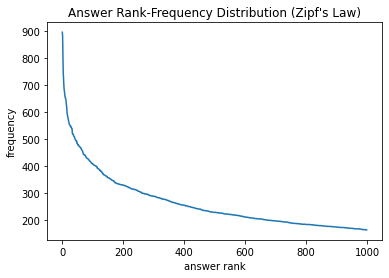

In [9]:
N = 1000    # len(answer_freqs)
ranks = range(N)
freqs = sorted(answer_freqs.values(), reverse=True)[:N]

fig, ax = plt.subplots()
ax.plot(ranks, freqs)

ax.set_xlabel("answer rank")
ax.set_ylabel("frequency")

ax.set_title("Answer Rank-Frequency Distribution (Zipf's Law)")

# ax.set_xscale("log")
# ax.set_yscale("log")

In [10]:
import nltk
nltk.download('words')
ENGLISH_WORDS = set(w.upper() for w in words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Russell\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [11]:
def is_english_ngram(string, n):
    if n == "":
        return False
    elif n == 1:
        return string in ENGLISH_WORDS
    
    for i in range(1, len(string) - 1):
        head, tail = string[:i], string[i:]
        if is_english_ngram(head, 1) and is_english_ngram(tail, n-1):
            return True
    
    return False


total_clues = sum(answer_freqs.values())
ngram_counts = [0] * 3

# exceptions = set(answer_freqs.keys())

for a in answer_freqs:
    for n in range(1, 4):
        if is_english_ngram(a, n):
            # if n==3: print(n, a)
            ngram_counts[n-1] += answer_freqs[a]
            # exceptions.remove(a)
            break

for n in range(1, 4):
    print(f"Percentage of answers that are english {n}-grams: {ngram_counts[n-1]/total_clues:0.3%}")

print(f"Total: {sum(ngram_counts)/total_clues:0.3%}")

Percentage of answers that are english 1-grams: 56.006%
Percentage of answers that are english 2-grams: 23.864%
Percentage of answers that are english 3-grams: 6.830%
Total: 86.701%


In [12]:
exceptions

NameError: name 'exceptions' is not defined